In [2]:
from api_keys import FINHUBB_API_KEY as key_api_finhubb

from pprint import pprint

import requests
import pandas as pd

In [3]:
# Specify params
symbol = 'IBM'
interval = 'D'
start_date = 1609455600     #2021-01-01 
end_date = 1612047600       #2021-01-31 

In [4]:
# Specify endpoints
base_url = 'https://finnhub.io/api/v1'
endpoint = '/quote?'
query = f'symbol={symbol}'
token = f'&token={key_api_finhubb}'
# &resolution={interval}&from={start_date}&to={end_date}&token={key_api_finhubb}'
column_dict = {
    'c': 'Current_price',
    'd': 'Change',
    'dp': 'Percent_change',
    'h': 'High',
    'l': 'Low',
    'o': 'Open',
    'pc': 'Previous_close',
    't': 'timestamp'
}

In [5]:

# Get request
response = requests.get(base_url + endpoint + query + token)
# pprint(response.json())

# Convert to DataFrame
data = pd.DataFrame.from_records(response.json(), index=[0]).rename(columns=column_dict)
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data.head()

,Current_price,Change,Percent_change,High,Low,Open,Previous_close,timestamp
0,287.65,-3.55,-1.2191,290.19,286.9,290,291.2,2025-07-02 20:00:00


In [6]:
from send_email import EmailSender

In [ ]:
# EmailSender_ = EmailSender()
# EmailSender_.send_email(
#     receiver_email="guilistocco@gmail.com",
#     subject="Teste direto com smtplib",
#     body="Este é um e-mail de teste simples.\nFunciona!"
# )



✅ Email enviado com sucesso.


In [8]:
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import GetAssetsRequest
from alpaca_secrets import APCA_API_KEY_ID, APCA_API_SECRET_KEY


In [9]:
trading_client = TradingClient(APCA_API_KEY_ID, APCA_API_SECRET_KEY)


In [10]:
account = trading_client.get_account()
print(f"Account ID: {account.id}")

Account ID: 8ac21b3e-bb76-4d75-b690-04c5227d0b8a


In [11]:
account

{   'account_blocked': False,
    'account_number': 'PA3R0VBBJ43M',
    'accrued_fees': '0',
    'buying_power': '200000',
    'cash': '100000',
    'created_at': datetime.datetime(2025, 7, 5, 16, 3, 40, 769492, tzinfo=TzInfo(UTC)),
    'crypto_status': <AccountStatus.ACTIVE: 'ACTIVE'>,
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'equity': '100000',
    'id': UUID('8ac21b3e-bb76-4d75-b690-04c5227d0b8a'),
    'initial_margin': '0',
    'last_equity': '100000',
    'last_maintenance_margin': '0',
    'long_market_value': '0',
    'maintenance_margin': '0',
    'multiplier': '2',
    'non_marginable_buying_power': '100000',
    'options_approved_level': 3,
    'options_buying_power': '100000',
    'options_trading_level': 3,
    'pattern_day_trader': False,
    'pending_transfer_in': None,
    'pending_transfer_out': None,
    'portfolio_value': '100000',
    'regt_buying_power': '200000',
    'short_market_value': '0',
    'shorting_enabled': T

In [12]:
from alpaca.data.historical import CryptoHistoricalDataClient

# No keys required for crypto data
client = CryptoHistoricalDataClient()

In [14]:
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

# Creating request object
request_params = CryptoBarsRequest(
  symbol_or_symbols=["BTC/USD"],
  timeframe=TimeFrame.Day,
  start=datetime(2022, 9, 1),
  end=datetime(2022, 9, 7)
)

In [15]:
# Retrieve daily bars for Bitcoin in a DataFrame and printing it
btc_bars = client.get_crypto_bars(request_params)

# Convert to dataframe
btc_bars.df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2022-09-01 05:00:00+00:00  20055.79  20292.00  19564.86  20156.76   
        2022-09-02 05:00:00+00:00  20156.76  20444.00  19757.72  19919.47   
        2022-09-03 05:00:00+00:00  19924.83  19968.20  19658.04  19806.11   
        2022-09-04 05:00:00+00:00  19805.39  20058.00  19587.86  19888.67   
        2022-09-05 05:00:00+00:00  19888.67  20180.50  19635.96  19760.56   
        2022-09-06 05:00:00+00:00  19761.39  20026.91  18534.06  18724.59   

                                         volume  trade_count          vwap  
symbol  timestamp                                                           
BTC/USD 2022-09-01 05:00:00+00:00   7141.975485     110122.0  19934.167845  
        2022-09-02 05:00:00+00:00   7165.911879      96231.0  20075.200868  
        2022-09-03 05:00:00+00:00   2677.652012      51551.0  19800.185480  
        2022-09-04 05:00:00+00:00   4325.678790      62082.0  19834.451414  
        2022-09-05 05:00:00+00:00   6274.552824      84784.0  19812.095982  
        2022-09-06 05:00:00+00:00  11217.789784     128106.0  19266.835520

In [34]:
import os
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce, OrderType
from alpaca.trading.models import Position
# from dotenv import load_dotenv
from datetime import datetime, timedelta
from alpaca_secrets import APCA_API_KEY_ID, APCA_API_SECRET_KEY, APCA_API_BASE_URL

# Carregar variáveis de ambiente
# load_dotenv()

API_KEY = APCA_API_KEY_ID
SECRET_KEY = APCA_API_SECRET_KEY
BASE_URL = APCA_API_BASE_URL

# Criar cliente de trading
trading_client = TradingClient(API_KEY, SECRET_KEY, paper=True)

# Verificar conta
account = trading_client.get_account()
print("Account status:", account.status)

# Verificar se já tem posição
symbol = "AAPL"
positions = trading_client.get_all_positions()
symbols_in_positions = [p.symbol for p in positions]

if symbol in symbols_in_positions:
    print(f"Já há posição em {symbol}")
else:
    print(f"Sem posição em {symbol}, enviando ordem...")

    order_data = MarketOrderRequest(
        symbol=symbol,
        qty=1,
        side=OrderSide.BUY,
        time_in_force=TimeInForce.GTC,
    )
    order = trading_client.submit_order(order_data)
    print("Ordem enviada:", order.id)

Account status: AccountStatus.ACTIVE
Sem posição em AAPL, enviando ordem...
Ordem enviada: 6a0a8964-b672-4d29-8db9-0446776ec7dd


In [42]:
import os
import time
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce
from alpaca.trading.models import Position
from alpaca.data.live.crypto import CryptoDataStream
from alpaca_secrets import APCA_API_KEY_ID, APCA_API_SECRET_KEY, APCA_API_BASE_URL

# Load API keys
API_KEY = APCA_API_KEY_ID
SECRET_KEY = APCA_API_SECRET_KEY

# Initialize trading client
trading_client = TradingClient(API_KEY, SECRET_KEY, paper=True)

# Define symbol and trade parameters
symbol = "BTCUSD"
qty = 0.0001  # Ajuste para valor mínimo aceitável

# Submit market order (BUY)
# order = trading_client.submit_order(
#     order_data=MarketOrderRequest(
#         symbol=symbol,
#         qty=qty,
#         side=OrderSide.BUY,
#         time_in_force=TimeInForce.GTC
#     )
# )
# print("Ordem enviada:", order)

# Wait for fill and check position
time.sleep(3)
try:
	position: Position = trading_client.get_open_position(symbol)
	print(f"\n--- POSIÇÃO EM {symbol} ---")
	print(f"Quantidade: {position.qty}")
	print(f"Preço médio: {position.avg_entry_price}")
	print(f"Valor atual (mark): {position.market_value}")
	print(f"Lucro/Prejuízo Unrealizado: {position.unrealized_pl}")
except Exception as e:
	print(f"Nenhuma posição aberta encontrada para {symbol} ou símbolo inválido.")
	print(f"Detalhes do erro: {e}")


--- POSIÇÃO EM BTCUSD ---
Quantidade: 0.00009975
Preço médio: 108112.36
Valor atual (mark): 10.777549
Lucro/Prejuízo Unrealizado: -0.006659


In [28]:
account = trading_client.get_account()
account

{   'account_blocked': False,
    'account_number': 'PA3R0VBBJ43M',
    'accrued_fees': '0',
    'buying_power': '199764.8',
    'cash': '99989.19',
    'created_at': datetime.datetime(2025, 7, 5, 16, 3, 40, 769492, tzinfo=TzInfo(UTC)),
    'crypto_status': <AccountStatus.ACTIVE: 'ACTIVE'>,
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'equity': '99999.96',
    'id': UUID('8ac21b3e-bb76-4d75-b690-04c5227d0b8a'),
    'initial_margin': '106.79',
    'last_equity': '100000',
    'last_maintenance_margin': '0',
    'long_market_value': '10.77',
    'maintenance_margin': '0',
    'multiplier': '2',
    'non_marginable_buying_power': '99786.42',
    'options_approved_level': 3,
    'options_buying_power': '99786.42',
    'options_trading_level': 3,
    'pattern_day_trader': False,
    'pending_transfer_in': None,
    'pending_transfer_out': None,
    'portfolio_value': '99999.96',
    'regt_buying_power': '199764.8',
    'short_market_value': '0',
  

In [44]:

symbol = "BTCUSD"

# Get our position in AAPL.
aapl_position = trading_client.get_open_position("BTCUSD")

# Get a list of all of our positions.
portfolio = trading_client.get_all_positions()

# Print the quantity of shares for each position.
for position in portfolio:
    print("{} shares of {}".format(position.qty, position.symbol))

0.00009975 shares of BTCUSD


In [39]:
trading_client.get_orders()

[{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
     'asset_id': UUID('b0b6dd9d-8b9b-48a9-ba46-b9d54906e415'),
     'canceled_at': None,
     'client_order_id': 'fede8962-c72e-4d4a-a0ba-c70b097be3bc',
     'created_at': datetime.datetime(2025, 7, 5, 19, 13, 10, 56344, tzinfo=TzInfo(UTC)),
     'expired_at': None,
     'expires_at': datetime.datetime(2025, 10, 3, 20, 0, tzinfo=TzInfo(UTC)),
     'extended_hours': False,
     'failed_at': None,
     'filled_at': None,
     'filled_avg_price': None,
     'filled_qty': '0',
     'hwm': None,
     'id': UUID('6a0a8964-b672-4d29-8db9-0446776ec7dd'),
     'legs': None,
     'limit_price': None,
     'notional': None,
     'order_class': <OrderClass.SIMPLE: 'simple'>,
     'order_type': <OrderType.MARKET: 'market'>,
     'position_intent': <PositionIntent.BUY_TO_OPEN: 'buy_to_open'>,
     'qty': '1',
     'ratio_qty': None,
     'replaced_at': None,
     'replaced_by': None,
     'replaces': None,
     'side': <OrderSide.BUY: 'buy'>,


In [46]:
from alpaca.data.requests import CryptoLatestOrderbookRequest

# Criar o request para o orderbook mais recente
orderbook_request = CryptoLatestOrderbookRequest(symbol_or_symbols=["BTC/USD"])

# Buscar o orderbook mais recente
orderbook = client.get_crypto_latest_orderbook(orderbook_request)
orderbook

{'BTC/USD': {   'asks': [   {'price': 108220.0, 'size': 0.80103},
                 {'price': 108248.9, 'size': 1.6202},
                 {'price': 108315.24, 'size': 2.4053},
                 {'price': 108486.69, 'size': 3.234},
                 {'price': 108500.0, 'size': 0.005},
                 {'price': 108751.1, 'size': 4.025},
                 {'price': 109000.0, 'size': 0.005},
                 {'price': 109292.72, 'size': 4.83},
                 {'price': 109500.0, 'size': 0.005},
                 {'price': 109644.670050761, 'size': 0.0028},
                 {'price': 110000.0, 'size': 0.0041},
                 {'price': 110444.87, 'size': 5.6202},
                 {'price': 110449.495, 'size': 6.4306},
                 {'price': 110487.883, 'size': 7.994},
                 {'price': 110492.86, 'size': 7.2338},
                 {'price': 110500.0, 'size': 0.005},
                 {'price': 110659.898477157, 'size': 0.096354887},
                 {'price': 110722.361, 'size': 9.

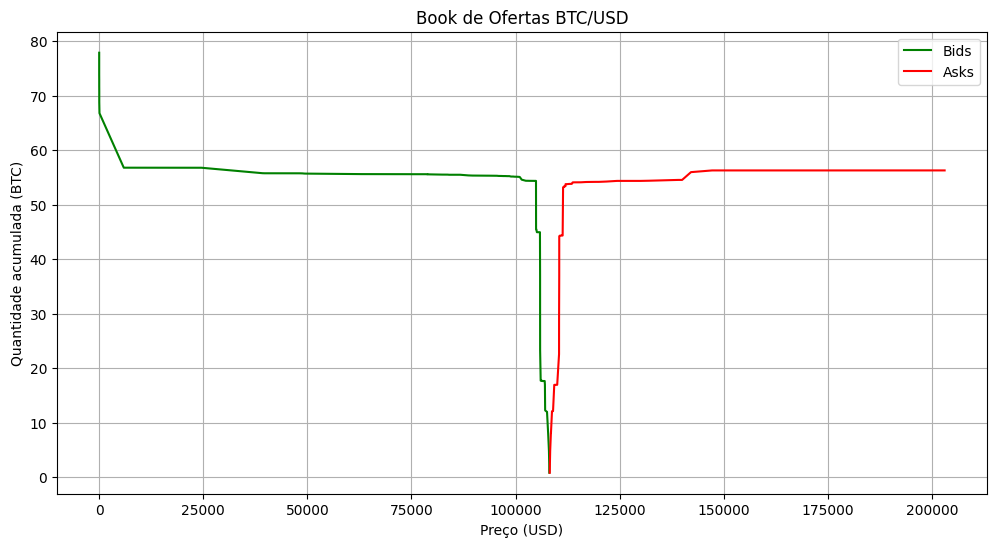

In [69]:
import numpy as np

import matplotlib.pyplot as plt

# Extrai bids e asks do orderbook
bids = dict(orderbook['BTC/USD'])['bids']
asks = dict(orderbook['BTC/USD'])['asks']

# Ordena bids decrescente e asks crescente por preço
bids_sorted = sorted(bids, key=lambda x: -dict(x)['price'])
asks_sorted = sorted(asks, key=lambda x: dict(x)['price'])

# Prepara listas de preços e tamanhos acumulados
bid_prices = [dict(b)['price'] for b in bids_sorted]
bid_sizes = np.cumsum([dict(b)['size'] for b in bids_sorted])

ask_prices = [dict(a)['price'] for a in asks_sorted]
ask_sizes = np.cumsum([dict(a)['size'] for a in asks_sorted])

# Plota o gráfico de profundidade
plt.figure(figsize=(12, 6))
plt.plot(bid_prices, bid_sizes, label='Bids', color='green')
plt.plot(ask_prices, ask_sizes, label='Asks', color='red')
plt.xlabel('Preço (USD)')
plt.ylabel('Quantidade acumulada (BTC)')
plt.title('Book de Ofertas BTC/USD')
plt.legend()
plt.grid(True)
plt.show()


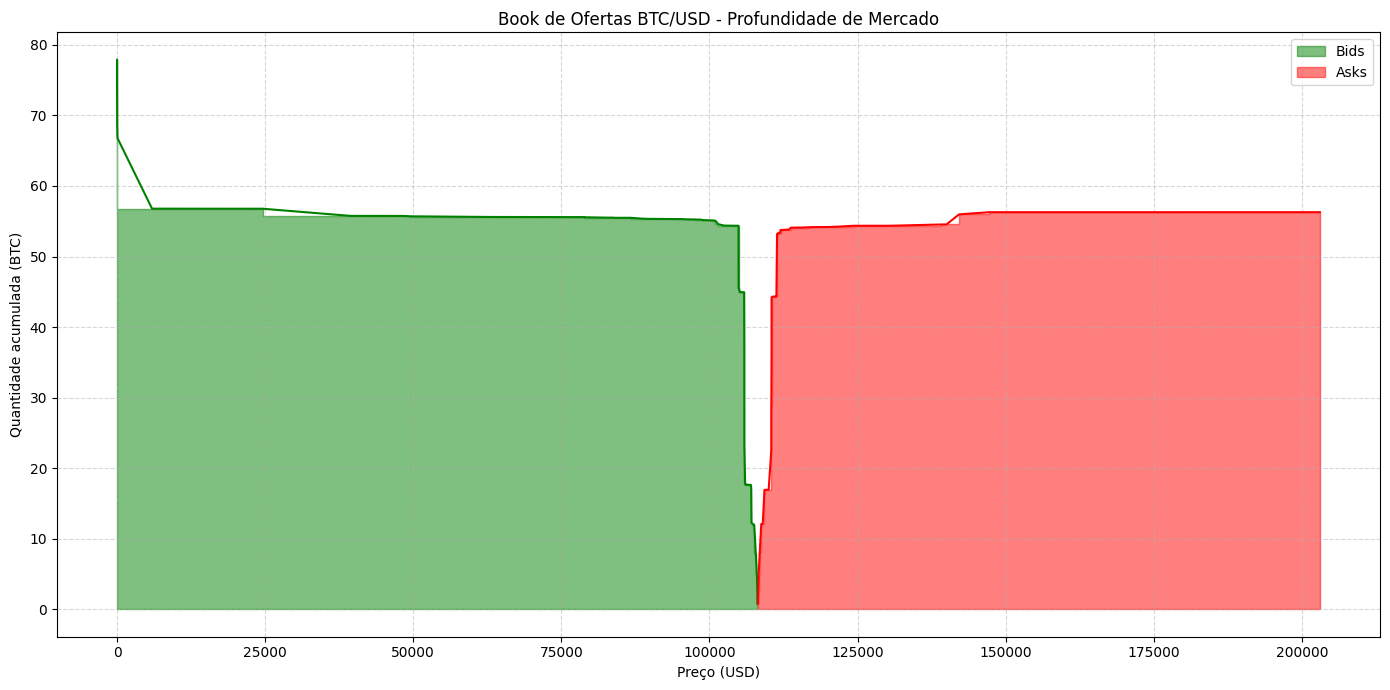

In [70]:
plt.figure(figsize=(14, 7))

# Área dos bids (verde)
plt.fill_between(bid_prices, bid_sizes, step='post', alpha=0.5, color='green', label='Bids')

# Área dos asks (vermelho)
plt.fill_between(ask_prices, ask_sizes, step='post', alpha=0.5, color='red', label='Asks')

plt.plot(bid_prices, bid_sizes, color='green')
plt.plot(ask_prices, ask_sizes, color='red')

plt.xlabel('Preço (USD)')
plt.ylabel('Quantidade acumulada (BTC)')
plt.title('Book de Ofertas BTC/USD - Profundidade de Mercado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


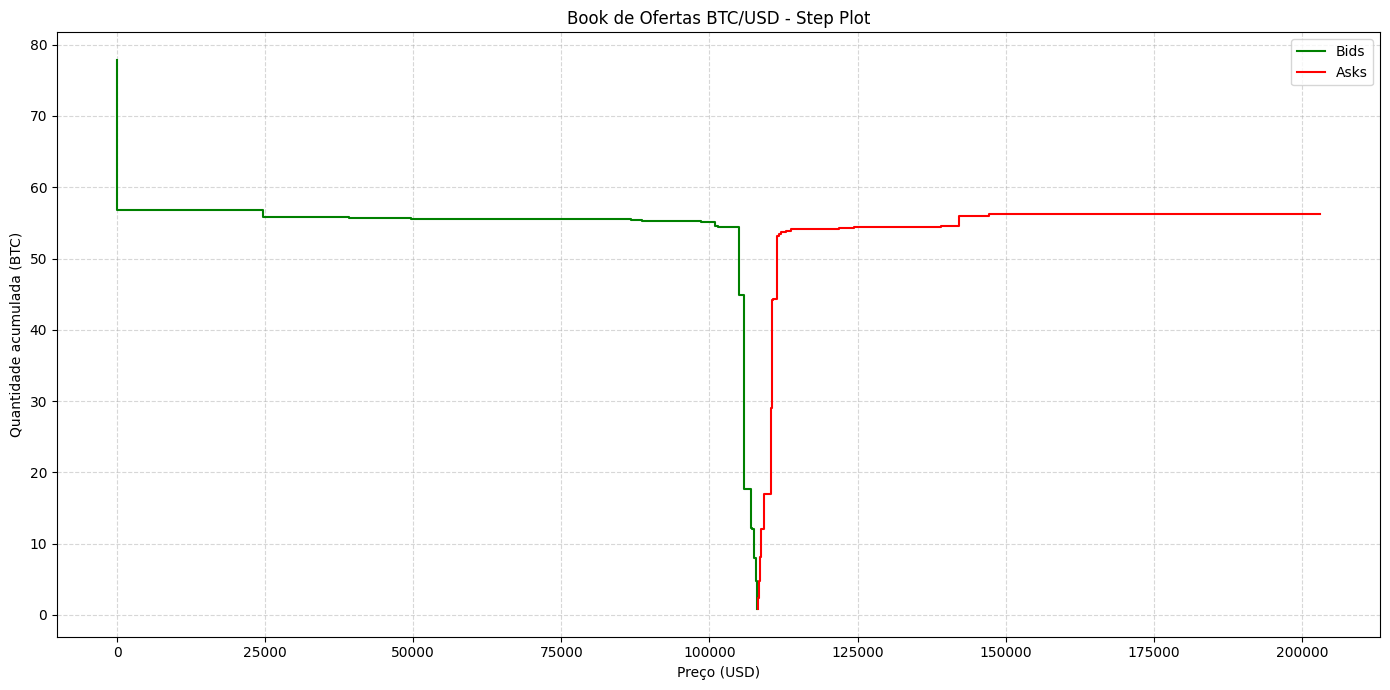

In [71]:
plt.figure(figsize=(14, 7))

# Gráfico de escada para bids (verde)
plt.step(bid_prices, bid_sizes, where='post', color='green', label='Bids')

# Gráfico de escada para asks (vermelho)
plt.step(ask_prices, ask_sizes, where='post', color='red', label='Asks')

plt.xlabel('Preço (USD)')
plt.ylabel('Quantidade acumulada (BTC)')
plt.title('Book de Ofertas BTC/USD - Step Plot')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
